In [31]:
from pandas import *
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [35]:
ratings = read_csv("rym_top_5000_all_time.csv")['Average Rating'].tolist()
dates = read_csv("rym_top_5000_all_time.csv")['Release Date'].tolist()
years = []
for date in dates:
    years.append(int(date[-4:]))

Y = ratings
X = np.array(years).reshape(-1, 1)



In [50]:
a_mean_ratings = np.mean(ratings)
a_mean_years = np.mean(years)
print(f"Średnia arytmetyczna\n ocen: {a_mean_ratings} \n lat: {a_mean_years}")

Średnia arytmetyczna
 ocen: 3.771304 
 lat: 1987.4574


In [9]:
def harmonic_mean(data):
    sum1 = 0
    for i in data:
        sum1 += 1/i
    return len(data)/sum1

In [51]:
h_mean_ratings = harmonic_mean(ratings)
h_mean_years = harmonic_mean(years)
print(f"Średnia harmoniczna\n ocen: {h_mean_ratings} \n lat: {h_mean_years}")

Średnia harmoniczna
 ocen: 3.7687982115189165 
 lat: 1987.3300564474273


In [10]:
def geometric_mean(data):
    prod = 1
    for i in data:
        prod *= i**(1/len(data))
    return prod

In [52]:
g_mean_ratings = geometric_mean(ratings)
g_mean_years = geometric_mean(years)
print(f"Średnia geometryczna\n ocen: {g_mean_ratings} \n lat: {g_mean_years}")

Średnia geometryczna
 ocen: 3.77003571281623 
 lat: 1987.393716287949


In [11]:
def truncated_mean(data, k):
    n = len(data)
    data.sort()
    sum1 = 0
    for i in range(k+1, n-k+1):
        sum1 += data[i]
    return sum1 / (n-2*k)


In [53]:
t_mean_ratings = truncated_mean(ratings,500)
t_mean_years = truncated_mean(years,500)
print(f"Średnia ucinana\n ocen: {t_mean_ratings} \n lat: {t_mean_years}")

Średnia ucinana
 ocen: 3.7585075000000105 
 lat: 1987.19825


In [12]:
def winsorized_mean(data, k):
    n = len(data)
    data.sort()
    sum1 = 0
    for i in range(k+2, n-k):
        sum1 += data[i]
    return 1/n * ((k+1)*data[k] + sum1 + (k+1)*data[n-k-1])

In [54]:
w_mean_ratings = winsorized_mean(ratings, 500)
w_mean_years = winsorized_mean(years, 500)
print(f"Średnia winsorowska\n ocen: {w_mean_ratings} \n lat: {w_mean_years}")

Średnia winsorowska
 ocen: 3.7648060000000094 
 lat: 1987.3586


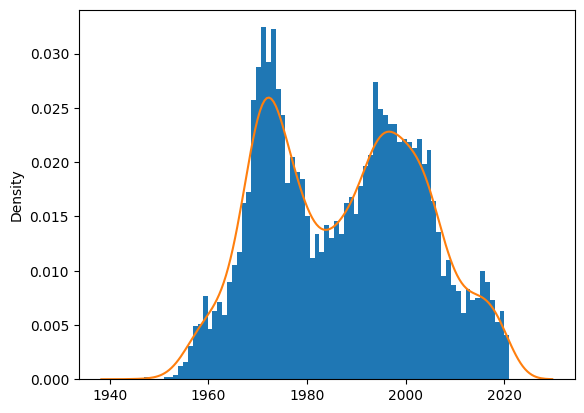

In [4]:
plt.hist(years,density=True,bins=75)
sns.kdeplot(years)
plt.show()

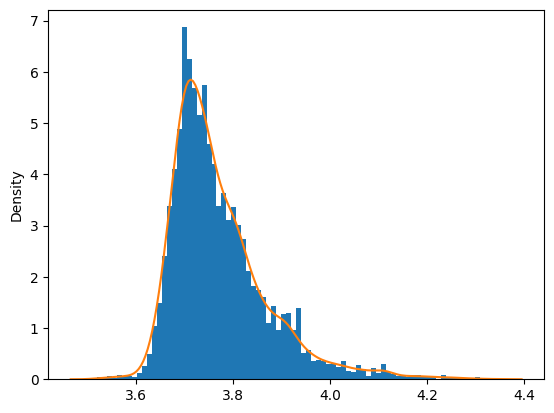

In [5]:
plt.hist(ratings,density=True,bins=80)
sns.kdeplot(ratings)
plt.show()

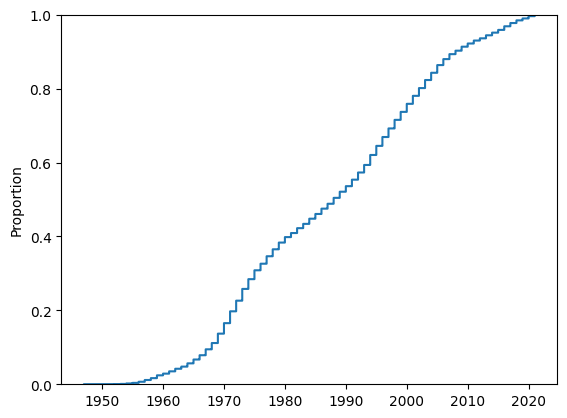

In [6]:
sns.ecdfplot(years)
plt.show()

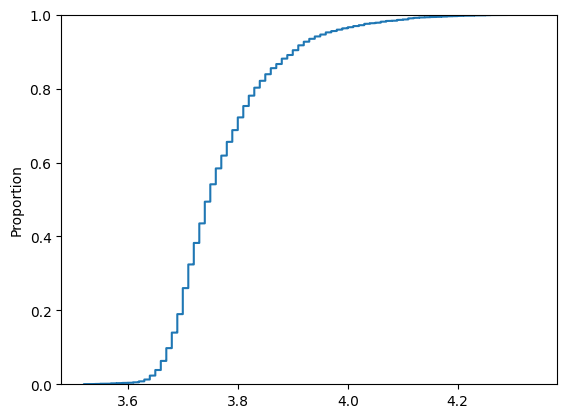

In [7]:
sns.ecdfplot(ratings)
plt.show()

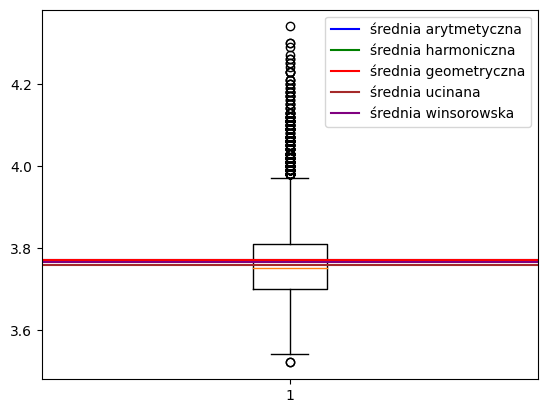

In [56]:
xs = np.linspace(0.5,1.5,1000)
plt.boxplot(ratings)
plt.plot(xs, [a_mean_ratings]*1000, label="średnia arytmetyczna",c="b")
plt.plot(xs, [h_mean_ratings]*1000, label="średnia harmoniczna", c="g")
plt.plot(xs, [g_mean_ratings]*1000, label="średnia geometryczna", c="r")
plt.plot(xs, [t_mean_ratings]*1000, label="średnia ucinana", c="brown")
plt.plot(xs, [w_mean_ratings]*1000, label="średnia winsorowska", c="purple")
plt.legend(loc="best")
plt.show()

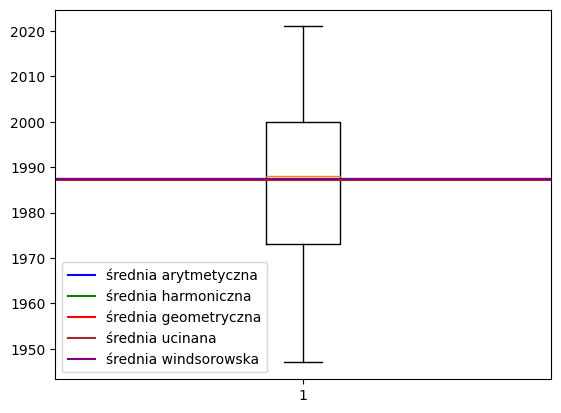

In [58]:
plt.boxplot(years)
plt.plot(xs, [a_mean_years]*1000, label="średnia arytmetyczna",c="b")
plt.plot(xs, [h_mean_years]*1000, label="średnia harmoniczna", c="g")
plt.plot(xs, [g_mean_years]*1000, label="średnia geometryczna", c="r")
plt.plot(xs, [t_mean_years]*1000, label="średnia ucinana", c="brown")
plt.plot(xs, [w_mean_years]*1000, label="średnia windsorowska", c="purple")
plt.legend(loc="best")
plt.show()

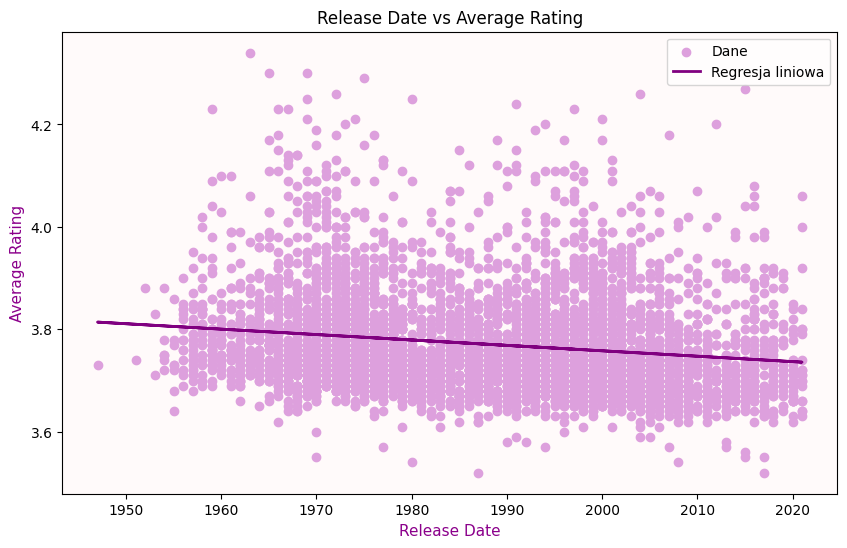

In [36]:
model = LinearRegression() #tworzymy model regresji i później trzeba go dopasować dlatego używam fit()
model.fit(X, Y) #to jest najlepsze dopasowanie prostej do danych 
Y_pred = model.predict(X)


plt.figure(figsize=(10, 6))
plt.scatter(X, Y, color='plum', label='Dane') 
plt.plot(X, Y_pred, color='purple', linewidth=2, label='Regresja liniowa')  
plt.title('Release Date vs Average Rating')
plt.xlabel('Release Date', fontsize=11, color= 'darkmagenta')
plt.ylabel('Average Rating',fontsize=11,  color= 'darkmagenta')
plt.gca().set_facecolor('snow')
plt.legend()
plt.show()

In [37]:
r_sq = model.score(X, Y)
print(f"Współczynnik determinacji: {r_sq}")

Współczynnik determinacji: 0.028823943933523388


In [44]:
print(f"Wyraz wolny prostej regresji: {model.intercept_}") #b
print(f"Współczynnik kierunkowy prostej regresji: {model.coef_[0]}") #a

Wyraz wolny prostej regresji: 5.87140491944869
Współczynnik kierunkowy prostej regresji: -0.0010566771994452255


In [48]:

corr_result=np.corrcoef(years, Y) 
print(f"Macierz korelacji ocen i lat:\n {corr_result}")

Macierz korelacji ocen i lat:
 [[ 1.         -0.16977616]
 [-0.16977616  1.        ]]
